In [1]:
import pandas as pd

In [2]:
df_match = pd.read_csv("df_diuretic_responsitive_match.csv")
df_match = df_match[["stay_id","label_diu_res","groupHPD"]]
df_match.label_diu_res.value_counts()

No diuretic       309
responsive        271
Non-responsive    235
Name: label_diu_res, dtype: int64

In [3]:
df_lifesupport = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_aumc/treatment/aumcdb_lifesupport.csv")
df_lifesupport = pd.merge(df_lifesupport,df_match,how="right",on="stay_id")
df_lifesupport = df_lifesupport.fillna(0)
df_lifesupport.head(2)

,stay_id,is_vaso,is_mv,is_rrt,label_diu_res,groupHPD
0,91,1.0,1.0,1.0,No diuretic,1
1,135,1.0,0.0,0.0,Non-responsive,1


In [6]:
df_lifesupport = df_lifesupport.groupby(["groupHPD","label_diu_res"]).agg({'is_vaso':'sum','is_mv':'sum','is_rrt':'sum',"stay_id":'count'}).reset_index()
df_lifesupport

,groupHPD,label_diu_res,is_vaso,is_mv,is_rrt,stay_id
0,1,No diuretic,76.0,82.0,25.0,90
1,1,Non-responsive,96.0,96.0,43.0,101
2,1,responsive,90.0,91.0,20.0,94
3,2,No diuretic,111.0,135.0,1.0,152
4,2,Non-responsive,80.0,91.0,2.0,94
5,2,responsive,116.0,127.0,2.0,129
6,3,No diuretic,64.0,65.0,18.0,67
7,3,Non-responsive,38.0,39.0,14.0,40
8,3,responsive,45.0,48.0,17.0,48


In [8]:
df_lifesupport_p = df_lifesupport
df_lifesupport_p["is_vaso_p"] = df_lifesupport_p["is_vaso"]/ df_lifesupport_p["stay_id"] * 100
df_lifesupport_p["is_mv_p"] = df_lifesupport_p["is_mv"]/ df_lifesupport_p["stay_id"] * 100
df_lifesupport_p["is_rrt_p"] = df_lifesupport_p["is_rrt"]/ df_lifesupport_p["stay_id"] * 100
#df_lifesupport_p["is_crrt_p"] = df_lifesupport_p["is_crrt"]/ df_lifesupport_p["stay_id"] * 100
df_lifesupport_p

,groupHPD,label_diu_res,is_vaso,is_mv,is_rrt,stay_id,is_vaso_p,is_mv_p,is_rrt_p
0,1,No diuretic,76.0,82.0,25.0,90,84.444444,91.111111,27.777778
1,1,Non-responsive,96.0,96.0,43.0,101,95.049505,95.049505,42.574257
2,1,responsive,90.0,91.0,20.0,94,95.744681,96.808511,21.276596
3,2,No diuretic,111.0,135.0,1.0,152,73.026316,88.815789,0.657895
4,2,Non-responsive,80.0,91.0,2.0,94,85.106383,96.808511,2.127660
5,2,responsive,116.0,127.0,2.0,129,89.922481,98.449612,1.550388
6,3,No diuretic,64.0,65.0,18.0,67,95.522388,97.014925,26.865672
7,3,Non-responsive,38.0,39.0,14.0,40,95.000000,97.500000,35.000000
8,3,responsive,45.0,48.0,17.0,48,93.750000,100.000000,35.416667


In [31]:
def plot_treatmentstat(c):
    import matplotlib.pyplot as plt
    import numpy as np
    size = 14
    titsize = 14
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, sharex=True,
                                        figsize=(4,4))
    ax0.set_title('Renal replacement therapy',fontsize=titsize)
    ax0.bar(df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["label_diu_res"].tolist(), df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["is_rrt_p"].tolist(),
            width=0.3,color=("#f8746a" ,"#74a8ff","#3fc968"), edgecolor='black')

    ax1.set_title('Mechanical ventilation',fontsize=titsize)
    ax1.bar(df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["label_diu_res"].tolist(), df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["is_mv_p"].tolist(),
            width=0.3,color=("#f8746a" ,"#74a8ff","#3fc968"), edgecolor='black' )

    ax2.set_title('Vasopressor',fontsize=titsize)
    ax2.bar(df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["label_diu_res"].tolist(), df_lifesupport_p[df_lifesupport_p["groupHPD"]==c]["is_vaso_p"].tolist(),
            width=0.3,color=("#f8746a" ,"#74a8ff","#3fc968") , edgecolor='black')

    ax1.set_ylabel("Percentage (%)",fontsize=size)
    ax2.tick_params(axis='x', labelrotation=10, labelsize=size)
    ax2.tick_params(axis='y', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax0.tick_params(axis='y', labelsize=12)
    
    ax0.set_ylim(0, 45)
    ax1.set_ylim(0, 100)
    ax2.set_ylim(0, 100)
    plt.tight_layout()
    tit = "aumcdb_other_treatment_stat_C" + str(c) + ".pdf"
    plt.savefig(tit, bbox_inches = 'tight')
    plt.show()

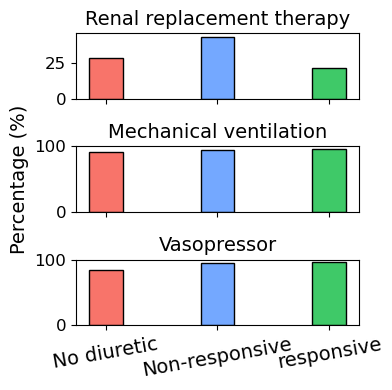

In [32]:
c = 1
plot_treatmentstat(c)

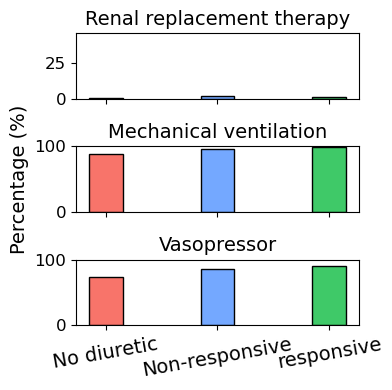

In [33]:
c = 2
plot_treatmentstat(c)

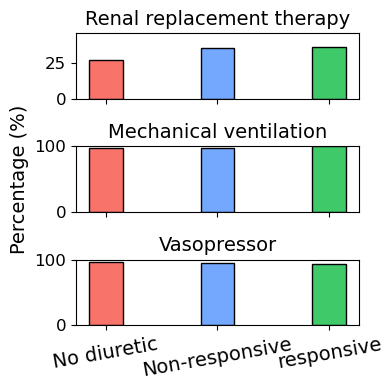

In [34]:
c = 3
plot_treatmentstat(c)